In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text Preprocessing

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Netflix Dataset.csv', encoding = 'unicode_escape')
df1.head(5)

,Title,Genre,Key Words,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,"$21,22,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,NaN,NaN,2.0,1.0,NaN,31 Oct 1949,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


In [ ]:
df1.shape

(9425, 29)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  9425 non-null   object 
 1   Genre                  9400 non-null   object 
 2   Key Words              9389 non-null   object 
 3   Languages              9255 non-null   object 
 4   Series or Movie        9425 non-null   object 
 5   Hidden Gem Score       9415 non-null   float64
 6   Country Availability   9414 non-null   object 
 7   Runtime                9424 non-null   object 
 8   Director               7120 non-null   object 
 9   Writer                 7615 non-null   object 
 10  Actors                 9314 non-null   object 
 11  View Rating            6827 non-null   object 
 12  IMDb Score             9417 non-null   float64
 13  Rotten Tomatoes Score  5445 non-null   float64
 14  Metacritic Score       4082 non-null   float64
 15  Awar

In [ ]:
df1.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,9415.000000,9417.000000,5445.000000,4082.000000,5226.000000,6376.000000,9.415000e+03
mean,5.540733,6.955517,64.691276,58.113425,9.735936,16.035602,6.014725e+04
std,2.447462,0.899681,25.269466,17.143187,19.524116,32.209094,1.463837e+05
min,0.600000,1.600000,0.000000,6.000000,1.000000,1.000000,5.000000e+00
25%,3.400000,6.500000,49.000000,46.000000,1.250000,2.000000,9.695000e+02
50%,5.300000,7.000000,70.000000,59.000000,4.000000,6.000000,6.602000e+03
75%,8.100000,7.500000,85.000000,71.000000,9.000000,15.000000,5.098700e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [ ]:
df1.isnull().sum()

Title                       0
Genre                      25
Key Words                  36
Languages                 170
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
selected_columns = ['Title', 'Genre','Key Words','Languages','Series or Movie','Runtime','Director','Actors','Summary','Release Date', 'IMDb Score', 'Image']

# Creating a copy with selected columns
df = df1[selected_columns].copy()
df.head()

,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,Release Date,IMDb Score,Image
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,< 30 minutes,Tomas Alfredson,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",A med student with a supernatural gift tries t...,12 Dec 2008,7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,1-2 hour,Coky Giedroyc,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...","When nerdy Johanna moves to London, things get...",08 May 2020,5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,> 2 hrs,Mez Tharatorn,"Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",After her ex-boyfriend cons her out of a large...,03 Dec 2020,7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,< 30 minutes,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",A group of social welfare workers led by their...,14 Jun 2011,7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,1-2 hour,Alf Sjöberg,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",An unhappily married farm worker struggling to...,31 Oct 1949,6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


<Axes: xlabel='Runtime', ylabel='Count'>

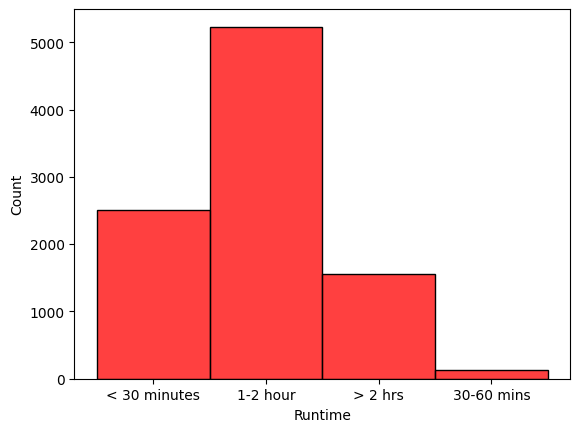

In [ ]:
# prompt: change the colour of the below histogram from blue to red, sns

sns.histplot(data=df, x="Runtime", color="red")


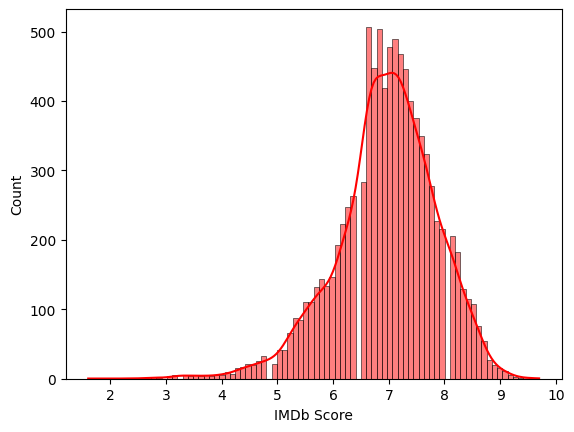

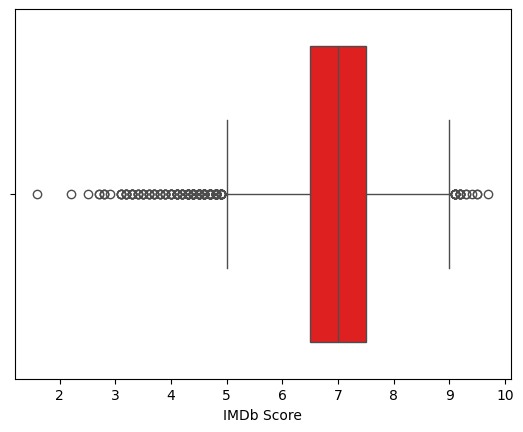

In [ ]:
sns.histplot(x= df['IMDb Score'] , data = df , kde = True , color = 'red')
plt.show()
sns.boxplot(x= df['IMDb Score'] , data = df,color='red')
plt.show()
# i guess we can use median to impute missing data in the IMDb score column
df['IMDb Score'] = df['IMDb Score'].fillna(df['IMDb Score'].median)

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Year'] = df['Release Date'].dt.year
df.drop('Release Date', axis=1, inplace=True)

In [ ]:
df['Release Year'].fillna(df['Release Year'].mode , inplace = True)
#null value in release year


In [ ]:
#null value in runtime
df.iloc[df[df['Runtime'].isnull()].index.item()]
#it is a series, so we will replace the nan value in runtime as <30 minutes

Title                                                            W1A
Genre                                                         Comedy
Key Words          TV Comedies,Mockumentaries,British TV Comedies...
Languages                                                    English
Series or Movie                                               Series
Runtime                                                          NaN
Director                                                         NaN
Actors             Sarah Parish, Jason Watkins, Hugh Bonneville, ...
Summary            The new Head of Values at the BBC deals with r...
IMDb Score                                                       7.8
Image              https://occ-0-2219-2218.1.nflxso.net/dnm/api/v...
Release Year                                                  2014.0
Name: 6922, dtype: object

In [ ]:
df['Runtime'] = df['Runtime'].fillna('<30 minutes')

In [ ]:
df['Director'].fillna('', inplace=True)
df['Languages'].fillna('' , inplace = True)
df['Actors'].fillna('' , inplace = True)
df['Genre'].fillna('' , inplace = True)
df['Key Words'].fillna('' , inplace = True)
df['Summary'].dropna(inplace = True)

In [ ]:
df.isnull().sum()

Title              0
Genre              0
Key Words          0
Languages          0
Series or Movie    0
Runtime            0
Director           0
Actors             0
Summary            5
IMDb Score         0
Image              0
Release Year       0
dtype: int64

In [ ]:
#removing punctuation
import string
string.punctuation
def remove_punctuation(text):
    if type(text) == str:
        punctuation_free = "".join([i for i in text if i not in string.punctuation])
        return punctuation_free
    else:
        return str(text)
#storing the puntuation free text

In [ ]:
#remove spaces between names
df['Genre'] = df['Genre'].str.replace(' ', '')
df['Actors'] = df['Actors'].str.replace(' ', '')
df['Key Words'] = df['Key Words'].str.replace(' ', '')
df['Director'] = df['Director'].str.replace(' ', '')

In [ ]:
df['Title'] = df['Title'].apply(lambda x:remove_punctuation(x))
df['Director'] = df['Director'].apply(lambda x:remove_punctuation(x))
df['Summary'] = df['Summary'].apply(lambda x:remove_punctuation(x))
df['Languages'] = df['Languages'].apply(lambda x:remove_punctuation(x))
df.head()

,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,IMDb Score,Image,Release Year
0,Lets Fight Ghost,"Crime,Drama,Fantasy,Horror,Romance","ComedyProgrammes,RomanticTVComedies,HorrorProg...",Swedish Spanish,Series,< 30 minutes,TomasAlfredson,"LinaLeandersson,KåreHedebrant,PerRagnar,Henrik...",A med student with a supernatural gift tries t...,7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,FilmsBasedonBooks,British",English,Movie,1-2 hour,CokyGiedroyc,"Cleo,PaddyConsidine,BeanieFeldstein,DónalFinn",When nerdy Johanna moves to London things get ...,5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0
2,The ConHeartist,"Comedy,Romance","RomanticComedies,Comedies,RomanticFilms,ThaiCo...",Thai,Movie,> 2 hrs,MezTharatorn,"KathaleeyaMcIntosh,NadechKugimiya,PimchanokLeu...",After her exboyfriend cons her out of a large ...,7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,2020.0
3,Gleboka woda,Drama,"TVDramas,PolishTVShows,SocialIssueTVDramas",Polish,Series,< 30 minutes,,"KatarzynaMaciag,PiotrNowak,MarcinDorocinski,Ju...",A group of social welfare workers led by their...,7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,2011.0
4,Only a Mother,Drama,"SocialIssueDramas,Dramas,MoviesBasedonBooks,Pe...",Swedish,Movie,1-2 hour,AlfSjöberg,"HugoBjörne,EvaDahlbeck,UlfPalme,RagnarFalck",An unhappily married farm worker struggling to...,6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,1949.0


In [ ]:
#converting to lower case
def lowercase(text):
    if type(text) == str:
        return text.lower()
    else:
        return str(text)

In [ ]:
df['Title'] = df['Title'].apply(lowercase)
df['Genre'] = df['Genre'].apply(lowercase)
df['Key Words'] = df['Key Words'].apply(lowercase)
df['Languages'] = df['Languages'].apply(lowercase)
df['Director'] = df['Director'].apply(lowercase)
df['Actors'] = df['Actors'].apply(lowercase)
df['Summary'] = df['Summary'].apply(lowercase)
df['Series or Movie'] = df['Series or Movie'].apply(lowercase)
df.head()

,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,IMDb Score,Image,Release Year
0,lets fight ghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...",swedish spanish,series,< 30 minutes,tomasalfredson,"linaleandersson,kårehedebrant,perragnar,henrik...",a med student with a supernatural gift tries t...,7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0
1,how to build a girl,comedy,"dramas,comedies,filmsbasedonbooks,british",english,movie,1-2 hour,cokygiedroyc,"cleo,paddyconsidine,beaniefeldstein,dónalfinn",when nerdy johanna moves to london things get ...,5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0
2,the conheartist,"comedy,romance","romanticcomedies,comedies,romanticfilms,thaico...",thai,movie,> 2 hrs,meztharatorn,"kathaleeyamcintosh,nadechkugimiya,pimchanokleu...",after her exboyfriend cons her out of a large ...,7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,2020.0
3,gleboka woda,drama,"tvdramas,polishtvshows,socialissuetvdramas",polish,series,< 30 minutes,,"katarzynamaciag,piotrnowak,marcindorocinski,ju...",a group of social welfare workers led by their...,7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,2011.0
4,only a mother,drama,"socialissuedramas,dramas,moviesbasedonbooks,pe...",swedish,movie,1-2 hour,alfsjöberg,"hugobjörne,evadahlbeck,ulfpalme,ragnarfalck",an unhappily married farm worker struggling to...,6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,1949.0


In [ ]:
df['Summary'][0]

'a med student with a supernatural gift tries to cash in on his abilities by facing off against ghosts till a wandering spirit brings romance instead'

In [ ]:
df['Summary'] = df['Summary'].astype(str)
df['Summary'] = df['Summary'].apply(lambda x: x.split())

df['Series or Movie'] = df['Series or Movie'].astype(str)
df['Series or Movie'] = df['Series or Movie'].apply(lambda x: x.split())

df['Director'] = df['Director'].astype(str)
df['Director'] = df['Director'].apply(lambda x: x.split())


df['Actors'] = df['Actors'].astype(str)
df['Actors'] = df['Actors'].apply(lambda x: x.split())

df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].apply(lambda x: x.split())

df['Key Words'] = df['Key Words'].astype(str)
df['Key Words'] = df['Key Words'].apply(lambda x: x.split())

df['Languages'] = df['Languages'].astype(str)
df['Languages'] = df['Languages'].apply(lambda x: x.split())
df.head()

,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,IMDb Score,Image,Release Year
0,lets fight ghost,"[crime,drama,fantasy,horror,romance]","[comedyprogrammes,romantictvcomedies,horrorpro...","[swedish, spanish]",[series],< 30 minutes,[tomasalfredson],"[linaleandersson,kårehedebrant,perragnar,henri...","[a, med, student, with, a, supernatural, gift,...",7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0
1,how to build a girl,[comedy],"[dramas,comedies,filmsbasedonbooks,british]",[english],[movie],1-2 hour,[cokygiedroyc],"[cleo,paddyconsidine,beaniefeldstein,dónalfinn]","[when, nerdy, johanna, moves, to, london, thin...",5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0
2,the conheartist,"[comedy,romance]","[romanticcomedies,comedies,romanticfilms,thaic...",[thai],[movie],> 2 hrs,[meztharatorn],"[kathaleeyamcintosh,nadechkugimiya,pimchanokle...","[after, her, exboyfriend, cons, her, out, of, ...",7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,2020.0
3,gleboka woda,[drama],"[tvdramas,polishtvshows,socialissuetvdramas]",[polish],[series],< 30 minutes,[],"[katarzynamaciag,piotrnowak,marcindorocinski,j...","[a, group, of, social, welfare, workers, led, ...",7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,2011.0
4,only a mother,[drama],"[socialissuedramas,dramas,moviesbasedonbooks,p...",[swedish],[movie],1-2 hour,[alfsjöberg],"[hugobjörne,evadahlbeck,ulfpalme,ragnarfalck]","[an, unhappily, married, farm, worker, struggl...",6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,1949.0


In [ ]:
#remove stopwords
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Summary']= df['Summary'].apply(lambda x:remove_stopwords(x))
df.head()

,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,IMDb Score,Image,Release Year
0,lets fight ghost,"[crime,drama,fantasy,horror,romance]","[comedyprogrammes,romantictvcomedies,horrorpro...","[swedish, spanish]",[series],< 30 minutes,[tomasalfredson],"[linaleandersson,kårehedebrant,perragnar,henri...","[med, student, supernatural, gift, tries, cash...",7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0
1,how to build a girl,[comedy],"[dramas,comedies,filmsbasedonbooks,british]",[english],[movie],1-2 hour,[cokygiedroyc],"[cleo,paddyconsidine,beaniefeldstein,dónalfinn]","[nerdy, johanna, moves, london, things, get, h...",5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0
2,the conheartist,"[comedy,romance]","[romanticcomedies,comedies,romanticfilms,thaic...",[thai],[movie],> 2 hrs,[meztharatorn],"[kathaleeyamcintosh,nadechkugimiya,pimchanokle...","[exboyfriend, cons, large, sum, money, former,...",7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,2020.0
3,gleboka woda,[drama],"[tvdramas,polishtvshows,socialissuetvdramas]",[polish],[series],< 30 minutes,[],"[katarzynamaciag,piotrnowak,marcindorocinski,j...","[group, social, welfare, workers, led, new, di...",7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,2011.0
4,only a mother,[drama],"[socialissuedramas,dramas,moviesbasedonbooks,p...",[swedish],[movie],1-2 hour,[alfsjöberg],"[hugobjörne,evadahlbeck,ulfpalme,ragnarfalck]","[unhappily, married, farm, worker, struggling,...",6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,1949.0


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Applying the lemmatizer function to the 'Summary' column
df['Summary'] = df['Summary'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,IMDb Score,Image,Release Year
0,lets fight ghost,"[crime,drama,fantasy,horror,romance]","[comedyprogrammes,romantictvcomedies,horrorpro...","[swedish, spanish]",[series],< 30 minutes,[tomasalfredson],"[linaleandersson,kårehedebrant,perragnar,henri...","[med, student, supernatural, gift, try, cash, ...",7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0
1,how to build a girl,[comedy],"[dramas,comedies,filmsbasedonbooks,british]",[english],[movie],1-2 hour,[cokygiedroyc],"[cleo,paddyconsidine,beaniefeldstein,dónalfinn]","[nerdy, johanna, move, london, thing, get, han...",5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0
2,the conheartist,"[comedy,romance]","[romanticcomedies,comedies,romanticfilms,thaic...",[thai],[movie],> 2 hrs,[meztharatorn],"[kathaleeyamcintosh,nadechkugimiya,pimchanokle...","[exboyfriend, con, large, sum, money, former, ...",7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,2020.0
3,gleboka woda,[drama],"[tvdramas,polishtvshows,socialissuetvdramas]",[polish],[series],< 30 minutes,[],"[katarzynamaciag,piotrnowak,marcindorocinski,j...","[group, social, welfare, worker, led, new, dir...",7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,2011.0
4,only a mother,[drama],"[socialissuedramas,dramas,moviesbasedonbooks,p...",[swedish],[movie],1-2 hour,[alfsjöberg],"[hugobjörne,evadahlbeck,ulfpalme,ragnarfalck]","[unhappily, married, farm, worker, struggling,...",6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,1949.0


EDA

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Netflix Dataset.csv' , encoding = 'unicode_escape')

['crime' 'drama' 'fantasy' 'horror' 'romance' 'comedy' 'mystery'
 'thriller' 'short' 'action' 'adventure' 'scifi' 'music' 'animation'
 'family' 'biography' 'war' 'history' 'documentary' 'filmnoir' 'sport'
 'gameshow' 'western' 'musical' 'realitytv' 'news' 'talkshow' 'adult']


<ipython-input-32-39114020fabf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Genre'  , data = genresdf , palette = 'Set3',width = 0.8 )


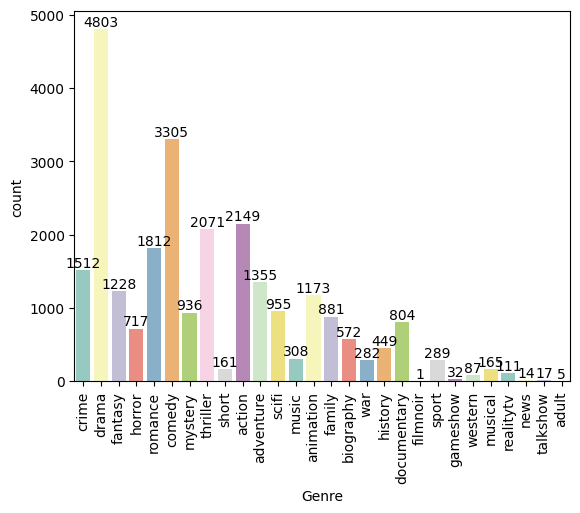

In [ ]:
df2['Genre'] = df2['Genre'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))
df2['Genre'] = df2['Genre'].apply(lambda x: word_tokenize(str(x)))
genres = list(df2.loc[0:9424, 'Genre' ])
genres_separate = []
for i in genres:
  for j in i:
    genres_separate.append(j)
genres_separate_new = []
for i in genres_separate:
  if i != 'nan':
    genres_separate_new.append(i)
  else:
    continue
genresdf = pd.DataFrame(genres_separate_new)
genresdf.columns = ['Genre']
print(genresdf['Genre'].unique())
ax = sns.countplot(x = 'Genre'  , data = genresdf , palette = 'Set3',width = 0.8 )
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-33-5a407878169b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Series or Movie' , data = df2  , palette = 'Set2' )
<ipython-input-33-5a407878169b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Series or Movie', data=df2, palette='Set2')


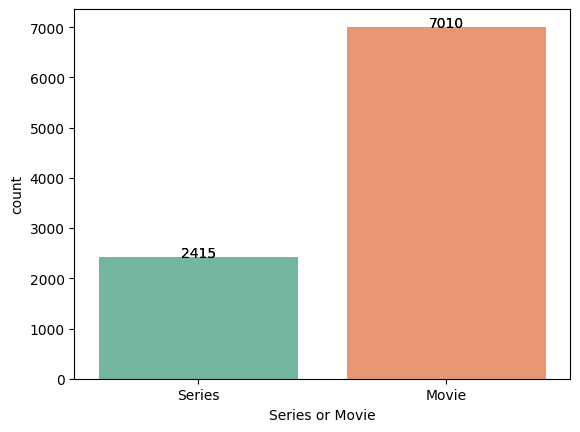

In [ ]:
sns.countplot(x = 'Series or Movie' , data = df2  , palette = 'Set2' )
ax = sns.countplot(x='Series or Movie', data=df2, palette='Set2')

# Display counts on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{int(height)}', ha="center")

<ipython-input-34-9fdc17eacea9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x  = 'Runtime of Movies' , data = runtimedf , palette = 'Set2')


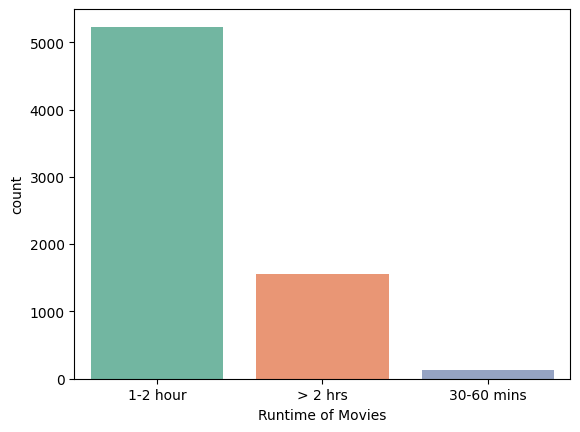

In [ ]:
runtimes = list(df2.loc[0:9425 , 'Runtime'])
runtimes_new = []
for i in runtimes:
  if i != '< 30 minutes':
    runtimes_new.append(i)
  else:
    continue
runtimedf = pd.DataFrame(runtimes_new)
runtimedf.columns = ['Runtime of Movies']
sns.countplot(x  = 'Runtime of Movies' , data = runtimedf , palette = 'Set2')

plt.show()

In [ ]:
df2.head()

,Title,Genre,Key Words,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,"$21,22,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,[comedy],"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"[comedy, romance]","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,[drama],"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,[drama],"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,NaN,NaN,2.0,1.0,NaN,31 Oct 1949,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


In [ ]:
netflix_date = df2[['Netflix Release Date']].dropna()

In [ ]:
netflix_date['year'] = netflix_date['Netflix Release Date'].apply(lambda x: x.split('-')[0])
netflix_date['month'] = netflix_date['Netflix Release Date'].apply(lambda x: x.split('-')[1])

In [ ]:
netflix_date = netflix_date[netflix_date['year'] != '2015']
netflix_date = netflix_date[netflix_date['year'] != '2021']

In [ ]:
netflix_date.sort_values(by =['year', 'month'])

,Netflix Release Date,year,month
6438,2016-01-29,2016,01
6439,2016-01-29,2016,01
6440,2016-01-27,2016,01
6441,2016-01-25,2016,01
6442,2016-01-25,2016,01
...,...,...,...
1316,2020-12-07,2020,12
1317,2020-12-06,2020,12
1318,2020-12-02,2020,12
1319,2020-12-02,2020,12


In [ ]:
drt = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0).T
drt

year,2016,2017,2018,2019,2020
month,,,,,
01,88,64,70,94,115
02,33,68,75,112,82
03,63,121,99,113,99
04,65,85,127,132,128
05,56,71,78,143,110
06,64,87,63,100,153
07,73,85,103,95,131
08,69,79,83,107,115
09,96,79,95,110,164


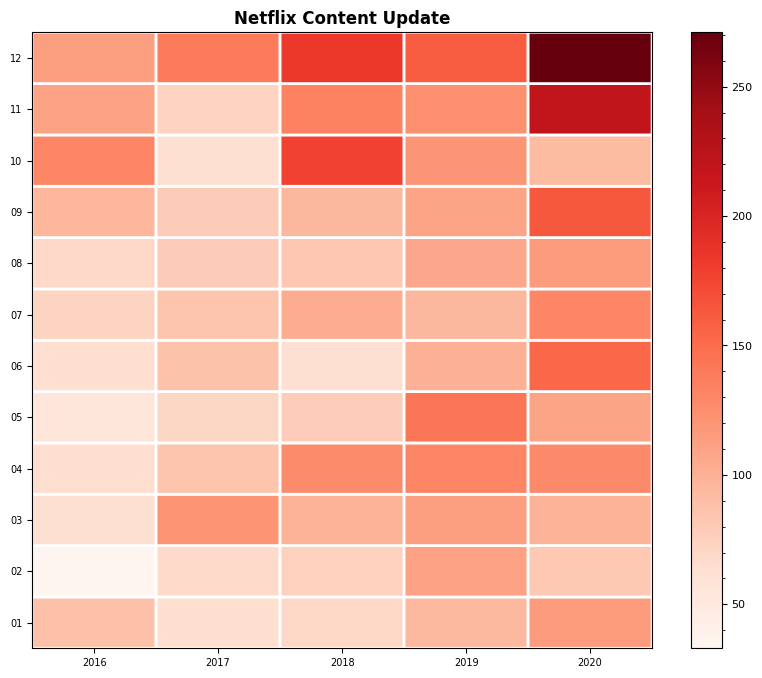

In [ ]:
plt.figure(figsize = (10,8), dpi = 100)
plt.pcolor(drt, cmap = 'Reds',edgecolors = 'white', linewidths = 2)
plt.xticks(np.arange(0.5, len(drt.columns), 1),drt.columns, fontsize = 7)
plt.yticks(np.arange(0.5, len(drt.index), 1), drt.index, fontsize = 7)

plt.title('Netflix Content Update', fontsize = 12, fontweight = 'bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()
plt.show()

Tagging

In [ ]:
df['Tags']=df['Genre'] + df['Key Words'] + df['Director'] + df['Actors'] + df['Languages'] + df['Summary'] + df['Series or Movie']
df.head()

,Title,Genre,Key Words,Languages,Series or Movie,Runtime,Director,Actors,Summary,IMDb Score,Image,Release Year,Tags
0,lets fight ghost,"[crime,drama,fantasy,horror,romance]","[comedyprogrammes,romantictvcomedies,horrorpro...","[swedish, spanish]",[series],< 30 minutes,[tomasalfredson],"[linaleandersson,kårehedebrant,perragnar,henri...","[med, student, supernatural, gift, try, cash, ...",7.9,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0,"[crime,drama,fantasy,horror,romance, comedypro..."
1,how to build a girl,[comedy],"[dramas,comedies,filmsbasedonbooks,british]",[english],[movie],1-2 hour,[cokygiedroyc],"[cleo,paddyconsidine,beaniefeldstein,dónalfinn]","[nerdy, johanna, move, london, thing, get, han...",5.8,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0,"[comedy, dramas,comedies,filmsbasedonbooks,bri..."
2,the conheartist,"[comedy,romance]","[romanticcomedies,comedies,romanticfilms,thaic...",[thai],[movie],> 2 hrs,[meztharatorn],"[kathaleeyamcintosh,nadechkugimiya,pimchanokle...","[exboyfriend, con, large, sum, money, former, ...",7.4,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,2020.0,"[comedy,romance, romanticcomedies,comedies,rom..."
3,gleboka woda,[drama],"[tvdramas,polishtvshows,socialissuetvdramas]",[polish],[series],< 30 minutes,[],"[katarzynamaciag,piotrnowak,marcindorocinski,j...","[group, social, welfare, worker, led, new, dir...",7.5,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,2011.0,"[drama, tvdramas,polishtvshows,socialissuetvdr..."
4,only a mother,[drama],"[socialissuedramas,dramas,moviesbasedonbooks,p...",[swedish],[movie],1-2 hour,[alfsjöberg],"[hugobjörne,evadahlbeck,ulfpalme,ragnarfalck]","[unhappily, married, farm, worker, struggling,...",6.7,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,1949.0,"[drama, socialissuedramas,dramas,moviesbasedon..."


In [ ]:
df.iloc[0].Tags

['crime,drama,fantasy,horror,romance',
 'comedyprogrammes,romantictvcomedies,horrorprogrammes,thaitvprogrammes',
 'tomasalfredson',
 'linaleandersson,kårehedebrant,perragnar,henrikdahl',
 'swedish',
 'spanish',
 'med',
 'student',
 'supernatural',
 'gift',
 'try',
 'cash',
 'ability',
 'facing',
 'ghost',
 'till',
 'wandering',
 'spirit',
 'brings',
 'romance',
 'instead',
 'series']

In [ ]:
df.isnull().sum()

Title              0
Genre              0
Key Words          0
Languages          0
Series or Movie    0
Runtime            0
Director           0
Actors             0
Summary            0
IMDb Score         0
Image              0
Release Year       0
Tags               0
dtype: int64

In [ ]:
new_df= df[['Title','Tags','Runtime','IMDb Score', 'Release Year' ,'Image']]
new_df.head()

,Title,Tags,Runtime,IMDb Score,Release Year,Image
0,lets fight ghost,"[crime,drama,fantasy,horror,romance, comedypro...",< 30 minutes,7.9,2008.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
1,how to build a girl,"[comedy, dramas,comedies,filmsbasedonbooks,bri...",1-2 hour,5.8,2020.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
2,the conheartist,"[comedy,romance, romanticcomedies,comedies,rom...",> 2 hrs,7.4,2020.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
3,gleboka woda,"[drama, tvdramas,polishtvshows,socialissuetvdr...",< 30 minutes,7.5,2011.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
4,only a mother,"[drama, socialissuedramas,dramas,moviesbasedon...",1-2 hour,6.7,1949.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: " ".join(x))

<ipython-input-46-4cef5220bbf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x: " ".join(x))


In [ ]:
new_df['Tags'][0]

In [ ]:
new_df.shape

Vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,stop_words='english')

In [ ]:
vectors=cv.fit_transform(new_df['Tags']).toarray()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

Recommending

recommendation based on title

In [ ]:
def recommend(movie):
  candidates = []
  movie_index = new_df[new_df['Title'] == movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(similarity[movie_index])) , reverse = True , key = lambda x: x[1])[1:6]
  for i in movies_list:
    candidates.append(list(new_df.iloc[i[0]]))
  for j in candidates:
    print(j[0])

In [ ]:
recommend('the dark knight')